# S08 T01 Tasca del test d'hipòtesis


## Exercise 1 

Select a sports theme dataset you like and select an attribute from the dataset. Calculate the p-value and say if you reject the null hypothesis by taking a 5% alpha.

In [1]:
import pandas as pd
from pandas import DataFrame, Series
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns
from scipy.stats import ttest_1samp, normaltest, shapiro, mannwhitneyu

%matplotlib inline
pd.set_option('display.max_columns', None)

In [2]:
pip freeze 

absl-py @ file:///C:/ci/absl-py_1623867339542/work
aiohttp @ file:///C:/ci/aiohttp_1632750093640/work
alabaster @ file:///home/ktietz/src/ci/alabaster_1611921544520/work
anaconda-client @ file:///C:/ci/anaconda-client_1635342752200/work
anaconda-navigator==2.1.0
anaconda-project @ file:///tmp/build/80754af9/anaconda-project_1626085644852/work
anyio @ file:///C:/ci/anyio_1620153418380/work/dist
appdirs==1.4.4
argh==0.26.2
argon2-cffi @ file:///C:/ci/argon2-cffi_1613037959010/work
arrow==0.13.1
asn1crypto @ file:///tmp/build/80754af9/asn1crypto_1596577642040/work
astor==0.8.1
astroid @ file:///C:/ci/astroid_1628063293445/work
astropy @ file:///C:/ci/astropy_1629829351783/work
astunparse==1.6.3
async-generator @ file:///home/ktietz/src/ci/async_generator_1611927993394/work
async-timeout==3.0.1
atomicwrites==1.4.0
attrs @ file:///tmp/build/80754af9/attrs_1620827162558/work
autopep8 @ file:///tmp/build/80754af9/autopep8_1615918855173/work
Babel @ file:///tmp/build/80754af9/babel_16208714174

https://www.kaggle.com/ekrembayar/fifa-21-complete-player-dataset

In [3]:
df = pd.read_csv('fifa21_male2.csv', low_memory=False)

## Exploring the data set

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17125 entries, 0 to 17124
Columns: 107 entries, ID to Gender
dtypes: float64(10), int64(45), object(52)
memory usage: 14.0+ MB


In [5]:
null= df.isnull().sum()
null

ID             0
Name           0
Age            0
OVA            0
Nationality    0
              ..
CB             0
RCB            0
RB             0
GK             0
Gender         0
Length: 107, dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
cols = ['BOV', 'BP', 'Position','Player Photo', 'Club Logo', 'Flag Photo', 'POT', 'Team & Contract', 'Growth', 'Joined', 'Loan Date End', 'Standing Tackle', 'Sliding Tackle', 'Goalkeeping', 'GK Diving', 'GK Handling', 'GK Kicking', 'GK Positioning', 'GK Reflexes', 'Total Stats', 'Base Stats', 'W/F', 'SM', 'A/W', 'D/W', 'IR', 'PAC', 'SHO', 'PAS', 'DRI', 'DEF', 'PHY', 'Hits', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'GK', 'Gender']
df = df.drop(columns=cols)

In [8]:
df.head()

,ID,Name,Age,OVA,Nationality,Club,Height,Weight,foot,Value,Wage,Release Clause,Contract,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking
0,2,G. Pasquale,33,69,Italy,Udinese,"6'0""",181lbs,Left,€625K,€7K,€0,2008 ~ 2016,313,75,50,59,71,58.0,338,73,65.0,60,69,71,347,68,74,68.0,69,68.0,347,74,68.0,69,68,68,320,72,69.0,63.0,66.0,50,NaN,208,70
1,16,Luis García,37,71,Spain,KAS Eupen,"5'10""",143lbs,Right,€600K,€7K,€1.1M,2014 ~ 2019,337,68,64,61,76,68.0,369,69,79.0,79,71,71,305,56,50,62.0,65,72.0,324,75,54.0,64,60,71,362,71,71.0,72.0,73.0,75,79.0,153,70
2,27,J. Cole,33,71,England,Coventry City,"5'9""",161lbs,Right,€1.1M,€15K,€0,2016 ~ 2020,337,80,64,41,77,75.0,387,79,84.0,77,69,78,295,48,42,71.0,59,75.0,284,72,58.0,29,56,69,317,69,39.0,69.0,74.0,66,NaN,99,35
3,36,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,"5'11""",165lbs,Right,€0,€0,€0,2009,264,54,70,60,80,NaN,255,68,NaN,46,64,77,176,59,62,NaN,55,NaN,239,63,NaN,51,66,59,271,59,70.0,72.0,NaN,70,NaN,75,34
4,41,Iniesta,36,81,Spain,Vissel Kobe,"5'7""",150lbs,Right,€5.5M,€12K,€7.2M,2018 ~ 2021,367,75,69,54,90,79.0,408,85,80.0,70,83,90,346,61,56,79.0,75,75.0,297,67,40.0,58,62,70,370,58,70.0,78.0,93.0,71,89.0,181,68


In [9]:
df.tail()

,ID,Name,Age,OVA,Nationality,Club,Height,Weight,foot,Value,Wage,Release Clause,Contract,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking
17120,259088,A. Medioub,22,64,France,CD Tondela,"6'6""",165lbs,Right,€550K,€2K,€0,"Jun 30, 2021 On Loan",197,35,23,66,47,26.0,193,44,26.0,33,34,56,243,52,55,46.0,48,42.0,279,48,70.0,59,74,28,218,69,58.0,23.0,29.0,39,46.0,198,61
17121,259090,W. Rickard,18,56,Wales,Burnley,"5'10""",170lbs,Right,€130K,€3K,€273K,2020 ~ 2021,248,50,43,50,64,41.0,264,57,42.0,50,61,54,298,61,63,52.0,54,68.0,271,51,62.0,53,57,48,259,51,50.0,55.0,53.0,50,46.0,132,34
17122,259091,C. Barrett,18,56,England,Burnley,"5'9""",154lbs,Right,€130K,€2K,€273K,2020 ~ 2022,218,55,34,53,42,34.0,212,52,43.0,34,36,47,308,66,61,54.0,59,68.0,233,28,61.0,53,54,37,256,58,55.0,49.0,45.0,49,43.0,163,55
17123,259101,J. Gazibegović,20,62,Bosnia Herzegovina,SK Sturm Graz,"5'9""",148lbs,Right,€475K,€3K,€784K,2020 ~ 2023,223,62,26,52,60,23.0,258,55,43.0,46,57,57,349,72,70,74.0,56,77.0,261,51,72.0,57,48,33,257,61,58.0,46.0,56.0,36,54.0,180,57
17124,259105,Pablo Rodríguez,18,59,Spain,Lecce,"5'10""",154lbs,Right,€325K,€2K,€788K,2020 ~ 2024,254,32,64,59,45,54.0,235,57,45.0,48,30,55,317,68,72,59.0,53,65.0,288,58,62.0,55,52,61,224,32,11.0,64.0,50.0,67,57.0,35,12


In [10]:
# Column names
print(df.columns.tolist())

['ID', 'Name', 'Age', 'OVA', 'Nationality', 'Club', 'Height', 'Weight', 'foot', 'Value', 'Wage', 'Release Clause', 'Contract', 'Attacking', 'Crossing', 'Finishing', 'Heading Accuracy', 'Short Passing', 'Volleys', 'Skill', 'Dribbling', 'Curve', 'FK Accuracy', 'Long Passing', 'Ball Control', 'Movement', 'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance', 'Power', 'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots', 'Mentality', 'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure', 'Defending', 'Marking']


## One atribute test

### Z-test

#### Statistical test and sample distribution

Our data is interval/ratio, we have one group and we know the standard deviation of the population. We assume that the distribution of the sample is normal, the sample size is greater thant 30 and is drawn at random from the population. The samples are independent from each other. So we choose Z-test. 

**Z-test** is a statistical method to determine whether the distribution of the test statistics can be approximated by a normal distribution. It is the method to determine whether two sample means are approximately the same or different when their variance is known and the sample size is large (should be >= 30).

The **sample** size should be greater than 30. Otherwise, we should use the t-test. Samples should be drawn at random from the population.Samples that are drawn from the population should be independent of each other.

The **standard deviation** of the population should be known.

The data should be **normally distributed**, however for large sample size, it is assumed to have a normal distribution.

A **hypothesis** is an educated guess/claim about a particular property of an object. Hypothesis testing is a way to validate the claim of an experiment.

- Null Hypothesis: The null hypothesis is a statement that the value of a population parameter (such as proportion, mean, or standard deviation) is equal to some claimed value. We either reject or fail to reject the null hypothesis. Null Hypothesis is denoted by H0.
- Alternate Hypothesis: The alternative hypothesis is the statement that the parameter has a value that is different from the claimed value. It is denoted by HA.

**Level of significance:** It means the degree of significance in which we accept or reject the null-hypothesis. Since in most of the experiments 100% accuracy is not possible for accepting or rejecting a hypothesis, so we, therefore, select a level of significance. It is denoted by alpha (∝).

**Steps to perform Z-test:**

- First, identify the null and alternate hypotheses.
- Determine the level of significance (∝).
- Find the critical value of z in the z-test using
- Calculate the z-test statistics
- Compare with the hypothesis and decide whether to reject or not to reject the null hypothesis.

**Two-tailed test:** In this test, our region of rejection is located to both extremes of the distribution. Here our null hypothesis is that the claimed value is equal to the mean population value.

#### Hypothesis

From a random sample of FIFA players we want to know if the mean is equal to the population mean:

H0 : μ = 75 kg The sample mean is equal to the know population mean.

HA : μ ≠ 75 kg The sample mean in not equal to the known population mean.

#### Data cleaning and transformation

In [11]:
# Erasing lbs from Weight
cleaned = []
txt = df['Weight']
for i in txt:
    t = re.sub("lbs", "", i)
    cleaned.append(re.sub(r'^RT[\s]+', '', t))
df['Weight'] = cleaned
df['Weight']=df['Weight'].astype('float')

In [12]:
# Creating a colum that transforms pouds to kilos 
df['Kilos']= df['Weight'] * 0.45359237
df.Kilos

0        82.100219
1        64.863709
2        73.028372
3        74.842741
4        68.038855
           ...    
17120    74.842741
17121    77.110703
17122    69.853225
17123    67.131671
17124    69.853225
Name: Kilos, Length: 17125, dtype: float64

In [13]:
# Statistics for Kilos
df['Kilos'].describe()

count    17125.000000
mean        75.141596
std          7.175008
min         49.895161
25%         69.853225
50%         74.842741
75%         79.832257
max        110.222946
Name: Kilos, dtype: float64

In [16]:
sample_df=df['Kilos'].sample(50)

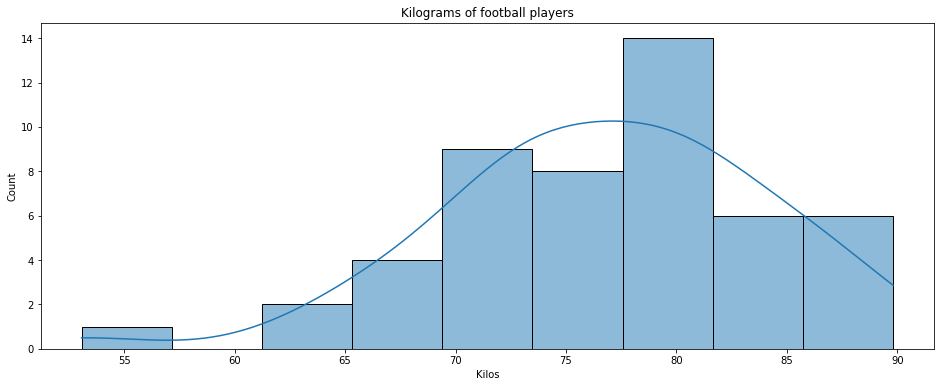

In [18]:
# Histograma of kilos
plt.figure(figsize=(16, 6))
sns.histplot(data=sample_df, kde=True)

plt.title('Kilograms of football players');
plt.xlabel('Kilos');

The shape of the histograf has sililarities with a normal distribution thought the tails are longer.

In [19]:
## Shapiro-Wilk Test (test of normality)
stat, p = shapiro(sample_df)
print('stat=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

stat=0.971, p=0.260
Sample looks Gaussian (fail to reject H0)


The Shapiro-Wilk test evaluates a data sample and quantifies how likely it is that the data was drawn from a Gaussian distribution
p <= alpha: reject H0, not normal.
p > alpha: fail to reject H0, normal.
This means that, in general, we are seeking results with a larger p-value to confirm that our sample was likely drawn from a Gaussian distribution.
A result above 5% does not mean that the null hypothesis is true. It means that it is very likely true given available evidence. The p-value is not the probability of the data fitting a Gaussian distribution; it can be thought of as a value that helps us interpret the statistical test.

In [20]:
# D'Agostino and Pearson's Test
from scipy.stats import normaltest
# normality test
stat, p = normaltest(sample_df)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=5.318, p=0.070
Sample looks Gaussian (fail to reject H0)


The D’Agostino’s K^2 test calculates summary statistics from the data, namely kurtosis and skewness, to determine if the data distribution departs from the normal distribution. Again, fails to reject H0, thus looks Gaussian.

In [21]:
# Anderson-Darling Test
from scipy.stats import anderson
# normality test
result = anderson(sample_df)
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < result.critical_values[i]:
		print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
	else:
		print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 0.269
15.000: 0.538, data looks normal (fail to reject H0)
10.000: 0.613, data looks normal (fail to reject H0)
5.000: 0.736, data looks normal (fail to reject H0)
2.500: 0.858, data looks normal (fail to reject H0)
1.000: 1.021, data looks normal (fail to reject H0)


Anderson-Darling Test also fails to reject H0, thus the distribution is normal. So we proceed to apply the Z-test, that is a parametric test.

In [22]:
# Z-test
import math
import numpy as np
from numpy.random import randn
from statsmodels.stats.weightstats import ztest

# Our alpha is 0.005 and the data has 50 numbers having mean 110 and sd 15
# similar to the IQ scores data we assume above
alpha =0.05
null_mean =75.14

# print mean and sd
print('mean=%.2f stdv=%.2f' % (np.mean(sample_df), np.std(sample_df)))

# now we perform the test. In this function, we passed data, in the value parameter
# we passed mean value in the null hypothesis, in alternative hypothesis we check whether the
# mean is larger

ztest_Score, p_value= ztest(sample_df,value = null_mean, alternative='larger')
# the function outputs a p_value and z-score corresponding to that value, we compare the
# p-value with alpha, if it is greater than alpha then we do not null hypothesis
# else we reject it.
print('stat=%.3f, p=%.3f' % (ztest_Score, p_value))


if(p_value < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to Reject Null Hypothesis")


mean=76.68 stdv=7.21
stat=1.490, p=0.068
Fail to Reject Null Hypothesis


#### Conclusion

With a significance level of 0.05 (Type I error rate or tolerance for making Type I error) and a probability (p-value) of 0.068, we fail  to reject the Null hypothesis H0 : μ = 75 kg The sample mean of FIFA players average kilos is equal to the know population mean. It doest'n mean that we have proved that the null hypothesis is "true".

## Exercise 2


Select two other atributes, calculate  p-value and say if you reject the null hypothesis by taking a 5% alpha.



**Statistical test and sample distribution**
Our data is interval/ratio, we have one group and we know the standard deviation of the population. We assume that the distribution of the sample is normal, the sample size is greater thant 30 and is drawn at random from the population. The samples are independent from each other. In this case we will use Student's t-test.

#### First attempt: Student’s t-test

Student’s t-test or t-test is a parametric inferential statistical method used for comparing the means between two different groups (two-sample t-test) or with the specific value (one-sample t-test).In contrast to the z-test, which requires a larger sample size, the t-test is specially developed for the small sample size data (n ≤ 30). t-test is also applies for extremely small sample size data (n ≤ 5).

**Assumptions:**
- Dependent variable should have an approximately normal distribution (Shapiro-Wilks Test).
- Observations are independent of each other.

**Hypotheses:**

- Null hypothesis: Sample mean is equal to the hypothesized or known population mean-
- Alternative hypothesis: Sample mean is not equal to the hypothesized or known population mean (two-tailed or two-sided)


#### Hypothesis


H0 : μ = The average weight of FC Barcelona players is equal to the average weight of other club's players.

HA : μ ≠ The average weight of FC Barcelona players is not equal to the average weight of other club's players.

#### Data cleaning and slicing

In [23]:
# Exploring data
df.groupby('Club')['Kilos'].describe()

,count,mean,std,min,25%,50%,75%,max
Club,,,,,,,,
1. FC Heidenheim 1846,25.0,79.233515,6.430408,66.224486,74.842741,79.832257,83.007404,92.079251
1. FC Kaiserslautern,29.0,76.641469,6.490474,67.131671,72.121187,77.110703,79.832257,91.172066
1. FC Köln,31.0,79.027496,5.715635,69.853225,74.389149,78.925072,83.007404,89.811289
1. FC Magdeburg,20.0,78.403441,4.301330,69.853225,76.203518,78.471480,80.399248,87.996920
1. FC Nürnberg,31.0,78.515376,7.237942,63.049339,73.935556,79.832257,83.007404,92.986436
...,...,...,...,...,...,...,...,...
Çaykur Rizespor,24.0,76.638211,6.064198,60.781378,72.121187,78.017888,82.100219,86.182550
Évian Thonon Gaillard FC,2.0,77.564295,0.641476,77.110703,77.337499,77.564295,77.791091,78.017888
Örebro SK,11.0,74.801505,5.534773,63.049339,73.028372,74.842741,78.925072,82.100219


In [24]:
# Create a new df
df_2 = pd.DataFrame(df, columns=['Club','Age','Kilos'])
df_2

,Club,Age,Kilos
0,Udinese,33,82.100219
1,KAS Eupen,37,64.863709
2,Coventry City,33,73.028372
3,Sunderland,36,74.842741
4,Vissel Kobe,36,68.038855
...,...,...,...
17120,CD Tondela,22,74.842741
17121,Burnley,18,77.110703
17122,Burnley,18,69.853225
17123,SK Sturm Graz,20,67.131671


In [25]:
# Droping null
df_2.isnull().sum()

Club     23
Age       0
Kilos     0
dtype: int64

In [26]:
df_3= df_2.dropna()

In [27]:
df_3.isnull().sum()

Club     0
Age      0
Kilos    0
dtype: int64

In [28]:
# Filtering FC. Barcelona
Barcelona= df_3[df_3["Club"].str.contains("FC Barcelona") == True].sample(19)

In [29]:
Barcelona.describe()

,Age,Kilos
count,19.000000,19.000000
mean,24.421053,71.070762
std,5.294817,7.339002
min,17.000000,55.791862
25%,20.000000,67.585263
50%,23.000000,72.121187
75%,28.500000,75.523130
max,35.000000,83.914588


In [30]:
# Filtering Other clubs
Other=df_3[df_3["Club"].str.contains("FC Barcelona") != True].sample(19)

In [31]:
Other.describe()

,Age,Kilos
count,19.000000,19.000000
mean,24.421053,73.983303
std,4.400957,7.028478
min,18.000000,63.956524
25%,21.500000,69.399633
50%,24.000000,74.842741
75%,27.500000,77.564295
max,34.000000,87.996920


#### Testing the sample Barcelona players normality

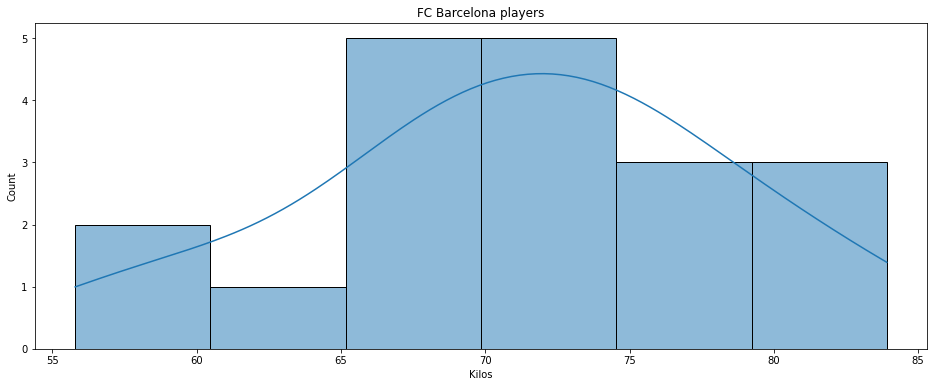

In [40]:
# Histograma of kilos FC Barcelon players
plt.figure(figsize=(16, 6))
sns.histplot(data=Barcelona, x='Kilos',kde=True)

plt.title('FC Barcelona players');
plt.xlabel('Kilos');

The histogram have some similarities with a normal distribution.

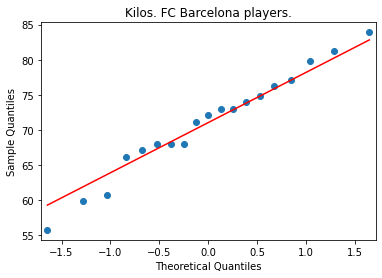

In [33]:
# q-q plot Barcelona players
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
qqplot(Barcelona['Kilos'], line='s')
pyplot.title('Kilos. FC Barcelona players.')
pyplot.show()

The Q-Q plot look like a normal distribution except in the lower part.

In [34]:
## Shapiro-Wilk Test
stat, p = shapiro(Barcelona['Kilos'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably Gaussian')
else:
	print('Probably not Gaussian')

stat=0.978, p=0.917
Probably Gaussian


With the Shapiro-Wilk the distribution is probably Gaussian.

#### Testig the sample Other players normality

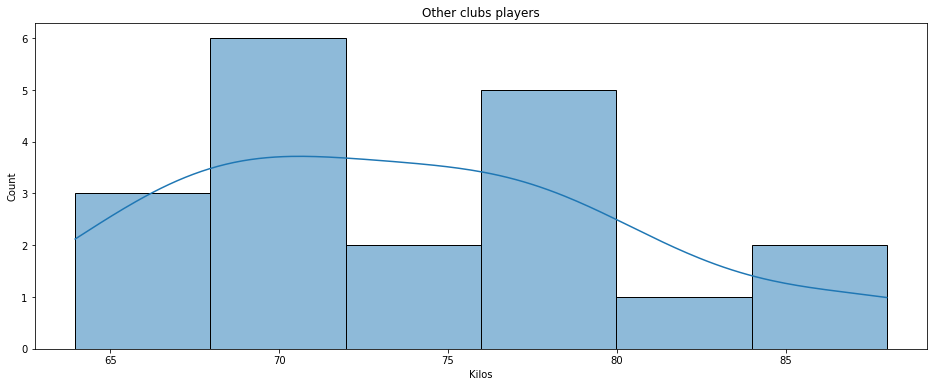

In [41]:
# Histograma of kilos Other players
plt.figure(figsize=(16, 6))
sns.histplot(data=Other, x='Kilos', kde=True)

plt.title('Other clubs players');
plt.xlabel('Kilos');

The histogram shape has some similarities with normal distribution.

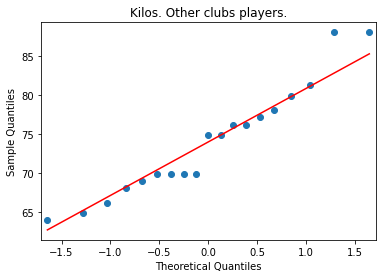

In [36]:
# q-q plot Other players
qqplot(Other['Kilos'], line='s')
pyplot.title('Kilos. Other clubs players.')
pyplot.show()

With the Q-Q plot show some similiarities with a Gaussian distribution.

In [43]:
## Shapiro-Wilk Test
stat, p = shapiro(Other['Kilos'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably Gaussian')
else:
	print('Probably not Gaussian')

stat=0.936, p=0.219
Probably Gaussian


In [44]:
# D'Agostino and Pearson's Test
# normality test
stat, p = normaltest(Other['Kilos'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=1.395, p=0.498
Sample looks Gaussian (fail to reject H0)


C:\Users\jmane\anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [46]:
# Anderson-Darling Test
from scipy.stats import anderson
# normality test
result = anderson(Other['Kilos'])
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < result.critical_values[i]:
		print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
	else:
		print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 0.437
15.000: 0.505, data looks normal (fail to reject H0)
10.000: 0.575, data looks normal (fail to reject H0)
5.000: 0.690, data looks normal (fail to reject H0)
2.500: 0.804, data looks normal (fail to reject H0)
1.000: 0.957, data looks normal (fail to reject H0)


**Having both samples a normal distribution we apply Two Sample t-test (a parametric test), but we will also try Mann-Whitney U Test (a nonparametric test).**

In [47]:
## Two-sample t-test
import scipy.stats as stats
alpha=0.05
tscore, pvalue = stats.ttest_ind(Other['Kilos'],Barcelona['Kilos'], equal_var=True)
print(f"Statistic= {tscore:.3f}")  
print(f"P Value= {pvalue:.3f} ")
if pvalue > alpha:
	print('Fail to reject H0')
else:
	print('Reject H0')
    
#find variance for each group
print(np.var(Barcelona['Kilos']), np.var(Other['Kilos']))



Statistic= 1.249
P Value= 0.220 
Fail to reject H0
51.02615732155702 46.79952956888564


#### Conclusion

Because the p-value of our test (0.220) is greater than alpha = 0.05, indicates that our observation is not so unlikely to have occurred by chance. Therefore, we fail to reject the null hypothesis of the test. We do not have sufficient evidence to say that the mean weight of FC players is different from other clubs's players.

#### Second attempt: Mann-Whitney U Test

**Mann-Whitney U Test**
Tests whether the distributions of two independent samples are equal or not. It's the nonparametric version of the Student t-test.

In [48]:
# Example of the Mann-Whitney U Test
from scipy.stats import mannwhitneyu
stat, p = mannwhitneyu(Barcelona['Kilos'], Other['Kilos'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=145.500, p=0.313
Probably the same distribution


#### Conclusion

The hypothesys are as follow:
H0: Sample distributions are equal. 
Reject H0: Sample distributions are not equal.

The default assumption or null hypothesis is that there is no difference between the distributions of the data samples. Rejection of this hypothesis suggests that there is likely some difference between the samples. More specifically, the test determines whether it is equally likely that any randomly selected observation from one sample will be greater or less than a sample in the other distribution. If violated, it suggests differing distributions.

Being p higher than 0.05 we fail to reject H0, so we do not have sufficient evidence to say that the mean weight of FC players is different from other clubs's players.

## Exercise 3

Select three other atributes, calculate the p-value and say if you reject the null hypothesis by taking a 5% alpha.

We take as atributes Attacking, Crossing, Finishing. As we have doubts that the distribution is normal we decide to use nonparametric statistical methods.

The **Kruskal-Wallis H-test** tests the null hypothesis that the population median of all of the groups are equal. It is a non-parametric version of ANOVA. It is s a rank-based nonparametric test that can be used to determine if there are statistically significant differences between two or more groups of an independent variable on a continuous or ordinal dependent variable.

**Hypothesis**

HO : μ =  Attacking,Crossing and Finishing skills have the same median.

HA : μ ≠  Attacking,Crossing and Finishing skills have not the same median.



In [49]:
# Example of the Kruskal-Wallis H Test
from scipy.stats import kruskal

stat, p = kruskal(df['Attacking'],df['Crossing'],df['Finishing'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=32879.160, p=0.000
Probably different distributions


**Conclusion**

Being de P-value inferior to 0.05, the differences between some of the medians are statistically significant, so we reject the null hypothesis and conclude that not all the group medians are equal. 